<a href="https://colab.research.google.com/github/MendesRamon/AnaliseObesidadeAdultos/blob/main/ProjetoAnaliseObesidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto - Analise de Obesidade entre Adultos por País - 1975 à 2016

### Análise Descritiva de Dados

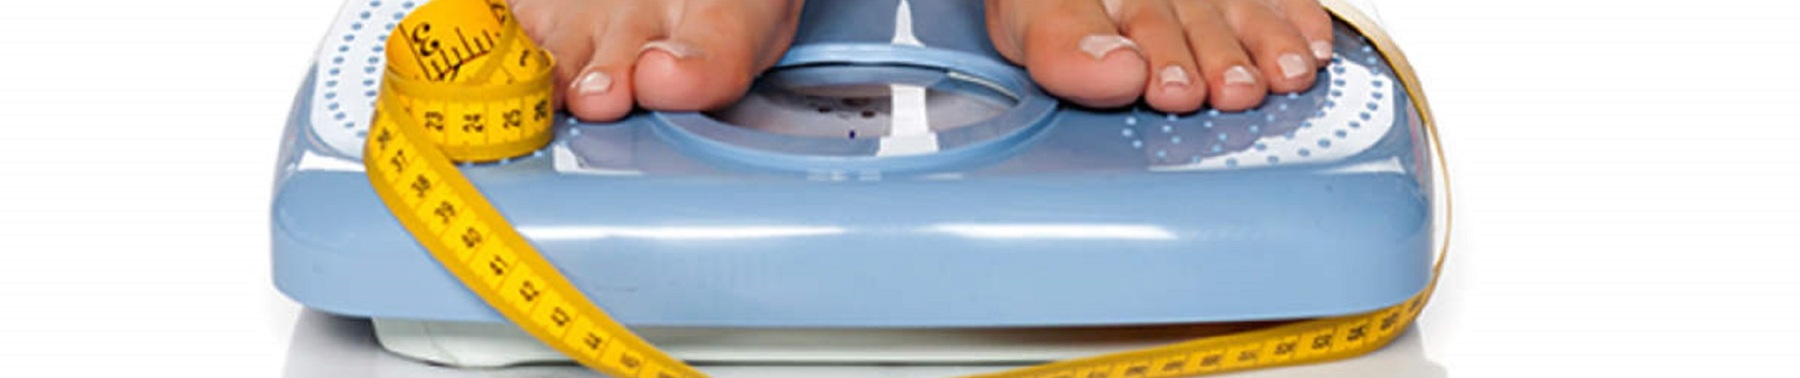

Este documento apresenta uma análise descritiva de dados de obesidade entre adultos de diferentes países entre os  anos 1975 a 2016. E tem como objetivo responder as principais perguntas que segue:

- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?
- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?
- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?
- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?
- Qual a diferença média do percentual de obesidade entre o sexos do feminino pro masculino nos últimos 5 anos do mundo?
-  a evolução da obesidade para ambos sexos no mundo.


Os dados deste projeto se encontra no link abaixo. E foi sedenvolvido com o objetivo de praticar a linguagem Python e análise de dados.

[Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)


_Desenvolvido por: Ramon Mendes_

[LinkedIn](www.linkedin.com/in/adm-ramon-mendes)


# Importação dos Dados e Análise do Dataset

- Importar bibliotecas necessárias;
- Visualizar o _dataset_;
- Utilizar métodos das bibliotecas (info, describe)

In [ ]:
#importando bibliotecas
import pandas as pd
import numpy as np

In [ ]:
#importando dados
df_obesity = pd.read_csv("obesity.csv")

- Análise do dataset

In [ ]:
df_obesity.head()

In [ ]:
df_obesity.info()

In [ ]:
df_obesity.describe()

In [ ]:
df_obesity.shape

In [ ]:
df_obesity.columns

# Tratamento dos dados

- No _dataset_ temos 24.570 linhas e 5 colunas;
- Foi identificado a coluna 'Unnamed: 0' que não será necessário, pois teremos outra coluna como índece, então será dado _drop_;
- Na coluna 'Obesity (%)' será extraído os percentuais de obesidade e receber o tipo de dado como _float_;
- Renomear a coluna 'Obesity (%)' para 'Obesity';
- Tipagem de dados;
- Manter apenas os dados classificados como obesos ('Obesity (%)' informa);
- Setar uma coluna como índice;
- Visualizar o _dataset_ tratado.


#### Limpeza e tratamento dos dados

In [ ]:
#excluindo a coluna 'Unnamed: 0'
del df_obesity['Unnamed: 0']

In [ ]:
#tratando a coluna Obesity (%)
#df_obesity['Obesity (%)'].value_counts()

In [ ]:
#extraindo o % de obesidade da coluna
#na coluna escolhida é dados split - transformando em lista
#uma vez que tenho a lista, posso pegar o primeiro valor(já que a coluna está padronizada com o % primeiro)
#atriuo essa transformação na própria coluna
df_obesity['Obesity (%)'] = df_obesity['Obesity (%)'].apply(lambda x: x.split()[0])

In [ ]:
#visualizando o resultado
df_obesity[['Obesity (%)']].head(3)

In [ ]:
df_obesity.head()

In [ ]:
df_obesity[['Obesity (%)']].describe()

É necessário tratar o 'No'

In [ ]:
#verificando o menor valor
df_obesity['Obesity (%)'].min()

In [ ]:
#renomeando coluna
df_obesity.rename(columns={'Obesity (%)': 'Obesity'}, inplace=True)

In [ ]:
df_obesity.columns

In [ ]:
#encontrando e trantando o dado
#transformando o "No" em "Nan"
df_obesity.loc[df_obesity['Obesity']== "No", "Obesity"] = np.nan

In [ ]:
#agora podemos tratar
#como quero analisar os classificados como obesos, os que não estão serão excluídos do dataset
df_obesity['Obesity'] = df_obesity['Obesity'].dropna()

In [ ]:
#tipando os dados numéricos:
#percentual em float;
#ano em inteiro.
df_obesity['Obesity'] = df_obesity['Obesity'].apply(lambda x: float(x))
df_obesity ['Year'] = df_obesity ['Year'].apply(lambda x: int(x))

In [ ]:
#agora, irei setar a coluna Year como index para melhor manusear o dataset
df_obesity.set_index("Year", inplace=True)

In [ ]:
df_obesity['Country'].value_counts().unique()

In [ ]:
df_obesity.info()

In [ ]:
df_obesity['Obesity'].hist()

In [ ]:
df_obesity.describe()

In [ ]:
#visualizando a tabela tratada
df_obesity.head()

# Análise dos Dados

- Aqui será extraído as respostas das perguntas pré-definidas no início do projeto.
- Será utilizado _output_ de tabelas, gráficos e estatística descritiva.
- Conclusão da  análise.

- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [ ]:
df_obesity[df_obesity.index==2015].groupby('Sex')[['Obesity']].mean()

- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [ ]:
#5 países com maior taxa de obesidade no período observado
df_obesity.groupby(['Country'])['Obesity'].max().sort_values(ascending=False).head(5)

In [ ]:
#5 países com maior taxa de obesidade no período observado
df_obesity.groupby('Country')['Obesity'].min().sort_values(ascending=True).head(5)

- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [ ]:
#defino uma tabela filtrada para melhor manuseio
df_obesity2015 = df_obesity[df_obesity.index == 2015]

In [ ]:
df_obesity2015.groupby(['Country'])['Obesity'].max().sort_values(ascending=False).head(5)

In [ ]:
df_obesity2015.groupby('Country')['Obesity'].min().sort_values(ascending=True).head(5)

- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [ ]:
#defino um dataset filtrado com o país
df_brazil = df_obesity[df_obesity['Country']=="Brazil"]

In [ ]:
import matplotlib.pyplot as plt
#Salvando imagem do plot
# Subtrai a obesidade de mulheres da obesidade de homens e plota
(df_brazil[df_brazil['Sex']=="Female"]['Obesity'] - df_brazil[df_brazil['Sex']=="Male"]['Obesity']).plot()
plt.title('Diferença % na Obesidade entre Mulheres e Homens no Brasil')
plt.xlabel('Ano')
plt.ylabel('Diferença de Obesidade (%)')
plt.grid(True)
plt.savefig('obesity_difference.png')  # Salva o gráfico como uma imagem
plt.show()  # Exibe o gráfico

- Qual a diferença média do percentual de obesidade entre o sexos do feminino pro masculino nos últimos 5 anos do mundo?

In [ ]:
df_sex = df_obesity.groupby(['Year', 'Sex'])['Obesity'].mean().unstack().reset_index()
df_sex['Difference'] = df_sex['Female'] - df_sex['Male']
df_sex.sort_values(by='Year', ascending=False).head(5)

In [ ]:
df_sex[df_sex['Year']>=2012]['Difference'].mean()

- A evolução da obesidade para ambos sexos no mundo.

In [ ]:
df_both = df_obesity[df_obesity['Sex']=="Both sexes"]

In [ ]:
df_both.groupby('Year')['Obesity'].mean().plot()
plt.title('Evolução de Obesidade de Ambos os Sexos no Mundo')
plt.xlabel('Ano')
plt.ylabel('Diferença de Obesidade (%)')
plt.grid(True)
plt.savefig('evolucao_ano.png')  # Salva o gráfico como uma imagem
plt.show()  # Exibe o gráfico

# Conclusão

Após aplicado uma análise descritiva sobre a obesidade em 126 países nos anos de 1975 à 2016, podemos observar que o percentual médio de obesidade no mundo de ambos os sexos em **2015** é de **22,90% para o sexo feminino e de 15,98% para o masculino**.

Os 5 países com a **maior** taxa de obesidade no período observado se encontra na tabela abaixo com os respectivos percentuais:

| País             | Obesidade (%) |
|------------------|---------------|
| Nauru            | 63.3          |
| Cook Islands     | 59.2          |
| Palau            | 58.8          |
| Marshall Islands | 57.3          |
| Tuvalu           | 56.2          |

Os 5 países com a **menor** taxa de obesidade no período observado se encontra na tabela abaixo com os respectivos percentuais:

| Country       | Obesity (%) |
|---------------|--------------|
| Nepal         | 0.1          |
| Viet Nam      | 0.1          |
| Cambodia      | 0.1          |
| Indonesia     | 0.1          |
| Timor-Leste   | 0.1          |

Quando olhamos para o ano de **2015** obtemos os seguintes resultados:

Maiores percentuais

| Country          | Obesity (%) |
|------------------|-------------|
| Nauru            | 63.1        |
| Cook Islands     | 58.8        |
| Palau            | 58.4        |
| Marshall Islands | 56.9        |
| Tuvalu           | 55.6        |

Menores percentuais:

| Country   | Obesity (%) |
|-----------|--------------|
| Viet Nam  | 1.5          |
| Uganda    | 1.7          |
| Ethiopia  | 1.8          |
| Rwanda    | 1.8          |
| Eritrea   | 1.9          |

Nos últimos 5 anos, no mundo, é observado que a média percentual de obesidade feminina é maior que a masculina, tendo uma **diferença média de 6,92% maior** para o feminino em comparação ao masculino.


| Year | Both sexes | Female   | Male     | Difference |
|------|------------|----------|----------|------------|
| 2016 | 19.960733  | 23.350262| 16.442932| 6.907330   |
| 2015 | 19.508377  | 22.899476| 15.980628| 6.918848   |
| 2014 | 19.043979  | 22.457068| 15.534031| 6.923037   |
| 2013 | 18.609424  | 22.021990| 15.097382| 6.924607   |
| 2012 | 18.178534  | 21.589005| 14.672251| 6.916754   |


![Evolucao Anual de Obesidade](/content/evolucao_ano.png)




